In [6]:
import pandas as pd 
import os 
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt 

In [9]:
url = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'
earthquake = pd.read_csv(url) 

fp = os.path.join("data", "ne_110m_admin_0_countries", "ne_110m_admin_0_countries.shp")
boundaries = gpd.read_file(fp)

In [10]:
earthquake.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


Subset earthquake data : magnitude >6, year 2014

Confirm crs are the same 

use lat long to project 

use boundaries as axis 

In [11]:
earthquake['time'].dtypes

dtype('O')

In [12]:
earthquake = earthquake[earthquake['time'].str.contains('2014')]

In [13]:
# Subset earthquake data 

earthquake = earthquake[earthquake['mag'] >= 6.5]
earthquake.head(5)

points = gpd.points_from_xy(earthquake.longitude, 
                            earthquake.latitude) 

earthquake = gpd.GeoDataFrame(earthquake, 
                              geometry = points,
                              crs = boundaries.crs)



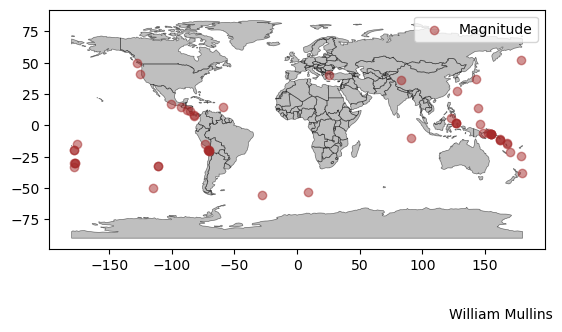

In [47]:
# Plot 

fig, ax = plt.subplots()

boundaries.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,  # Update point color
                 edgecolor='black',
                 color = 'grey',
                 linewidth=0.5)

earthquake.plot(ax=ax,         # Add plot to axis
                alpha=0.5,     # Adjust transparency
                color = 'brown',  # Update point color
                label = 'Magnitude'
               )

plt.figtext(x = .75, 
            y = .1,
            s ="William Mullins")
plt.legend()
